# Industrial Copper Modeling

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as stat
import pylab

In [2]:
df=pd.read_excel('Copper_Set.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB
None


In [3]:
df1=df.copy()
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
col_name={'quantity tons':'quantity_tons','item type':'item_type','delivery date':'delivery_date'}
df1.rename(columns=col_name, inplace=True)


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity_tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item_type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery_date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
df1.shape

(181673, 14)

In [7]:
for col in df1.columns:
    print(f"{col} - {len(df1[col].unique())}") 


id - 181672
item_date - 253
quantity_tons - 181673
customer - 1170
country - 18
status - 10
item_type - 7
application - 31
thickness - 595
width - 1386
material_ref - 16564
product_ref - 33
delivery_date - 29
selling_price - 9796


In [8]:
df1.isnull().sum()

id                   2
item_date            1
quantity_tons        0
customer             1
country             28
status               2
item_type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery_date        1
selling_price        1
dtype: int64

In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery_date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [10]:
df1.material_ref.value_counts()

material_ref
DX51D+Z                                     922
G9010                                       856
DC01 RED.FLAT KUCHNIA EKO 2.2               777
DC01                                        725
G9006                                       671
                                           ... 
0000000000000000000000000000000003050080      1
0000000000000000000000000000000004001568      1
0000000000000000000000000000000003016460      1
0000000000000000000000000000000003016459      1
202006170005.IO.1.1                           1
Name: count, Length: 16563, dtype: int64

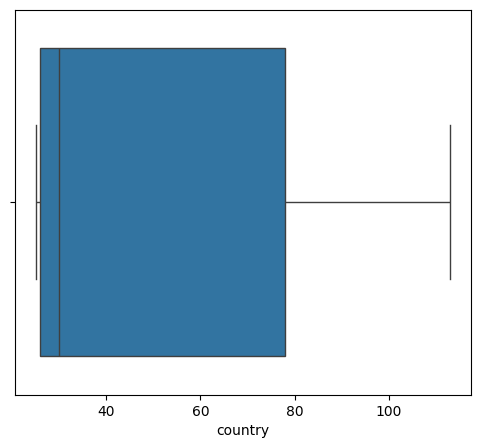

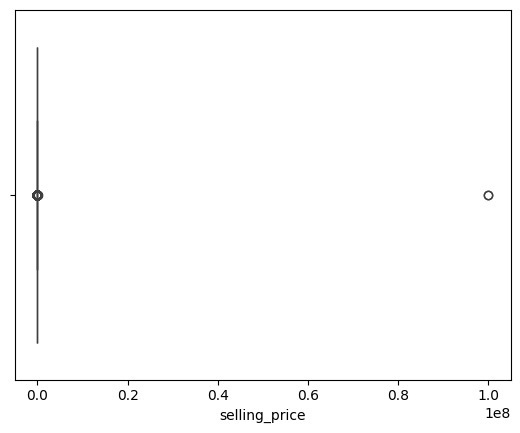

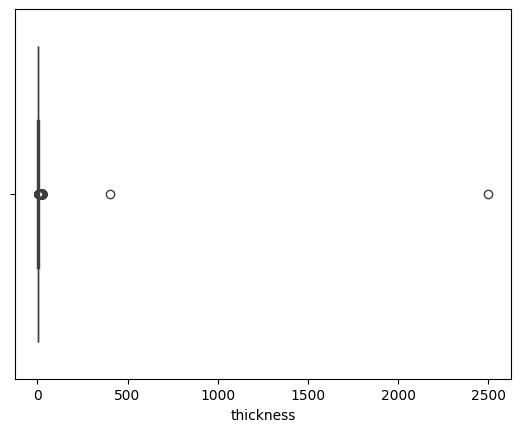

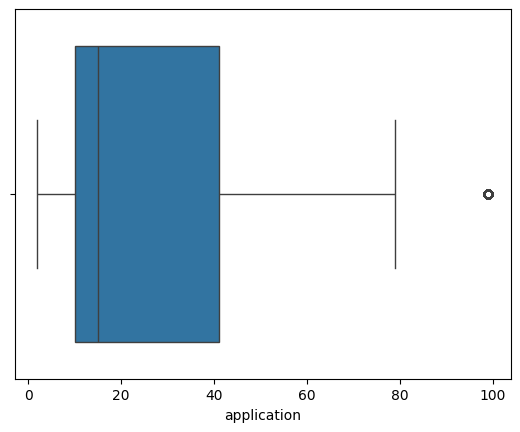

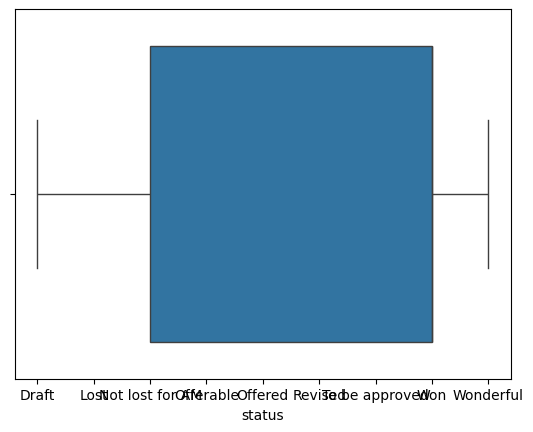

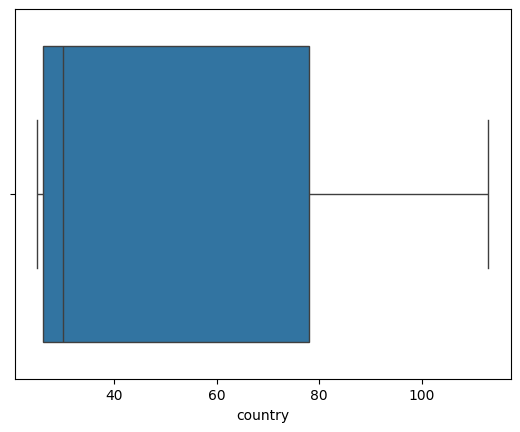

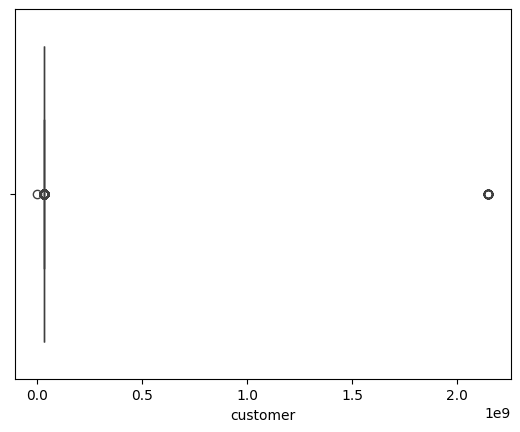

In [141]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=df1,x='country')
plt.show()
sns.boxplot(data=df1,x='selling_price')
plt.show()
sns.boxplot(data=df1,x='thickness')
plt.show()
sns.boxplot(data=df1,x='application')
plt.show()
sns.boxplot(data=df1,x='status')
plt.show()
sns.boxplot(data=df1,x='country')
plt.show()
sns.boxplot(data=df1,x='customer')
plt.show()

In [12]:
# df1.item_date = df1.item_date.ffill()
# df1.delivery_date = df1.delivery_date.bfill()
df1.id=df1.id.fillna('NA')
df1.status = df1.status.fillna(df1.status.mode()[0])
df1.customer=df1.customer.fillna(df1.customer.median())
df1.country=df1.country.fillna(df1.country.median())
df1.application=df1.application.fillna(df1.application.median())
df1.thickness=df1.thickness.fillna(df1.thickness.median())
df['material_ref'] = np.where(df['material_ref'].astype(str).str.startswith('00000'), np.nan, df['material_ref'])


In [13]:
print(df1.isnull().sum())
print(df1.shape)

id                   0
item_date            1
quantity_tons        0
customer             0
country              0
status               0
item_type            0
application          0
thickness            0
width                0
material_ref     77919
product_ref          0
delivery_date        1
selling_price        1
dtype: int64
(181673, 14)


In [14]:
type_dict = {'id': 'str', 'quantity_tons': 'float32','customer':'int64','country':'int8','status':'category','item_type':'category','application':'int8',
            'thickness':'float32','width':'int32','product_ref':'int64','selling_price':'float64'}


In [15]:
df1.quantity_tons = df1.quantity_tons.replace('e', 0)


C:\Users\sansu\AppData\Local\Temp\ipykernel_11752\955684390.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.quantity_tons = df1.quantity_tons.replace('e', 0)


In [16]:
num=df1.select_dtypes(include=['int','float']).columns
for col in num:
    print(f"{col} -  {(df1[col] <= 0).sum()}")


item_date -  0
quantity_tons -  5
customer -  0
country -  0
application -  0
thickness -  0
width -  0
product_ref -  0
delivery_date -  0
selling_price -  7


In [17]:
col_to_mask=['quantity_tons', 'selling_price']
df1[col_to_mask] =df1[col_to_mask] .mask(df1[col_to_mask] <= 0, np.nan)


In [18]:

df1 = df1.astype(type_dict)

df1.item_date = pd.to_datetime(df1.item_date,format='%Y%m%d', errors='coerce').dt.date
df1.delivery_date = pd.to_datetime(df1.delivery_date,format='%Y%m%d', errors='coerce').dt.date
df1.item_date = df1.item_date.ffill()
df1.delivery_date = df1.delivery_date.bfill()
df1.item_date=df1.item_date.astype('datetime64[s]')
df1.delivery_date=df1.delivery_date.astype('datetime64[ns]')
df1.selling_price=df1.selling_price.fillna(df1.selling_price.median())
df1.quantity_tons=df1.quantity_tons.fillna(df1.quantity_tons.median())
df1 = df1.drop(columns=['material_ref'])

In [19]:
print(df1.isnull().sum())
df1.info()

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181673 non-null  object        
 1   item_date      181673 non-null  datetime64[s] 
 2   quantity_tons  181673 non-null  float32       
 3   customer       181673 non-null  int64         
 4   country        181673 non-null  int8          
 5   status         181673 non-null  category      
 6   item_type      181673 non-null  category      
 7   application    181673 non-null  int8          
 8   thickness      181673 non-null  float32       
 9   width          181673 non-null  int32         
 10  

In [20]:
df1.describe().T


,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:42,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181673.0,5874.905762,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.75
customer,181673.0,30512207.3383,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.622752
country,181673.0,44.890727,25.0,26.0,30.0,78.0,113.0,24.403034
application,181673.0,25.614406,2.0,10.0,15.0,41.0,99.0,17.753421
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.285898,1.0,1180.0,1250.0,1500.0,2990.0,261.634673
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery_date,181673,2021-01-25 22:44:33.431935232,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181673.0,1918.075544,0.1,669.0,812.0,953.0,100001015.0,331794.729145


In [21]:

print(df1.isnull().sum())
print(df1.shape)

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64
(181673, 13)


In [22]:
df1.describe().T


,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:42,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181673.0,5874.905762,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.75
customer,181673.0,30512207.3383,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.622752
country,181673.0,44.890727,25.0,26.0,30.0,78.0,113.0,24.403034
application,181673.0,25.614406,2.0,10.0,15.0,41.0,99.0,17.753421
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.285898,1.0,1180.0,1250.0,1500.0,2990.0,261.634673
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery_date,181673,2021-01-25 22:44:33.431935232,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181673.0,1918.075544,0.1,669.0,812.0,953.0,100001015.0,331794.729145


In [23]:
print(df1.duplicated().sum())
print(df1.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181673 non-null  object        
 1   item_date      181673 non-null  datetime64[s] 
 2   quantity_tons  181673 non-null  float32       
 3   customer       181673 non-null  int64         
 4   country        181673 non-null  int8          
 5   status         181673 non-null  category      
 6   item_type      181673 non-null  category      
 7   application    181673 non-null  int8          
 8   thickness      181673 non-null  float32       
 9   width          181673 non-null  int32         
 10  product_ref    181673 non-null  int64         
 11  delivery_date  181673 non-null  datetime64[ns]
 12  selling_price  181673 non-null  float64       
dtypes: category(2), datetime64[ns](1), datetime64[s](1), float32(2), float64(1), int32(1), int64(2), int8(

In [24]:
print(df1.status.unique())
print(df1.status.value_counts())

['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']
Categories (9, object): ['Draft', 'Lost', 'Not lost for AM', 'Offerable', ..., 'Revised', 'To be approved', 'Won', 'Wonderful']
status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64


In [25]:
print(df1.item_type.unique())
print(df1.item_type.value_counts())


['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
Categories (7, object): ['IPL', 'Others', 'PL', 'S', 'SLAWR', 'W', 'WI']
item_type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64


In [26]:
df1['status_En']=df1.status.map({'Lost':0,'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4, 'Wonderful':1, 'Revised':5, 'Offered':6, 'Offerable':7}).astype('int8')
df1['item_type_En'] = OrdinalEncoder().fit_transform(df[['item type']]).astype('int8')



In [27]:
df1.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,status_En,item_type_En
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151138,30156308,28,Won,W,10,2.00,1500,1670798778,2021-07-01,854.00,1,5
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024841,30202938,25,Won,W,41,0.80,1210,1668701718,2021-04-01,1047.00,1,5
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127960,30153963,30,Won,WI,28,0.38,952,628377,2021-01-01,644.33,1,6
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411072,30349574,32,Won,S,59,2.30,1317,1668701718,2021-01-01,768.00,1,3
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526245,30211560,28,Won,W,10,4.00,2000,640665,2021-03-01,577.00,1,5


In [28]:
print(df1.status.unique() , "\n" , df1.status_En.unique())
print(df1.status.value_counts(),"\n", df1.status_En.value_counts()) 

['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']
Categories (9, object): ['Draft', 'Lost', 'Not lost for AM', 'Offerable', ..., 'Revised', 'To be approved', 'Won', 'Wonderful'] 
 [1 2 3 0 4 5 6 7]
status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64 
 status_En
1    116013
0     34438
4     19573
5      4276
3      4170
2      3140
6        53
7        10
Name: count, dtype: int64


In [29]:
print(df1.item_type.unique(),"\n",df1.item_type_En.unique())
print(df1.item_type.value_counts(),"\n",df1.item_type_En.value_counts())


['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
Categories (7, object): ['IPL', 'Others', 'PL', 'S', 'SLAWR', 'W', 'WI'] 
 [5 6 3 1 2 0 4]
item_type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64 
 item_type_En
5    105615
3     69236
2      5660
1       610
6       524
0        27
4         1
Name: count, dtype: int64


In [30]:
print(df1.isnull().sum().sum())
print(df1.info())
df1.describe().T

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181673 non-null  object        
 1   item_date      181673 non-null  datetime64[s] 
 2   quantity_tons  181673 non-null  float32       
 3   customer       181673 non-null  int64         
 4   country        181673 non-null  int8          
 5   status         181673 non-null  category      
 6   item_type      181673 non-null  category      
 7   application    181673 non-null  int8          
 8   thickness      181673 non-null  float32       
 9   width          181673 non-null  int32         
 10  product_ref    181673 non-null  int64         
 11  delivery_date  181673 non-null  datetime64[ns]
 12  selling_price  181673 non-null  float64       
 13  status_En      181673 non-null  int8          
 14  item_type_En   181673 non-null  int8          
dty

,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:42,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181673.0,5874.905762,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.75
customer,181673.0,30512207.3383,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.622752
country,181673.0,44.890727,25.0,26.0,30.0,78.0,113.0,24.403034
application,181673.0,25.614406,2.0,10.0,15.0,41.0,99.0,17.753421
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.285898,1.0,1180.0,1250.0,1500.0,2990.0,261.634673
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery_date,181673,2021-01-25 22:44:33.431935232,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181673.0,1918.075544,0.1,669.0,812.0,953.0,100001015.0,331794.729145


In [31]:
df1.dtypes

id                       object
item_date         datetime64[s]
quantity_tons           float32
customer                  int64
country                    int8
status                 category
item_type              category
application                int8
thickness               float32
width                     int32
product_ref               int64
delivery_date    datetime64[ns]
selling_price           float64
status_En                  int8
item_type_En               int8
dtype: object

In [32]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode()[0]
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution Plot for {column}')
    plt.axvline(mean,color='red',label='Mean')
    plt.axvline(median,color='blue',label='Median')
    plt.axvline(mode,color='green',label='Mode')
    plt.legend()

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

In [143]:
def plot(df, column):
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode()[0]
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
    plt.axvline(mean, color='red', label='Mean')
    plt.axvline(median, color='black', label='Median')
    plt.axvline(mode, color='green', label='Mode')
    plt.legend()

def plot1(df, column):
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode()
    sns.histplot(data=df, x=column, kde=True,bins=50)
    plt.title(f'Distribution Plot for {column}')
    plt.axvline(mean,color='red',label='Mean')
    plt.axvline(median,color='black',label='Median')
    plt.axvline(mode[0],color='green',label='Mode')
    plt.legend()

def plot2(df, column):
    stat.probplot(df[column],dist='norm',plot=pylab)
    plt.title(f'Violin Plot for {column}')


In [144]:
def plots(df1,width):
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    plot(df1,width)

    plt.subplot(1,3,2)
    plot1(df1,width)

    plt.subplot(1,3,3)
    plot2(df1,width)

    plt.tight_layout() 
    plt.show()


In [145]:
data=df1.select_dtypes(include='number',)
skew_dict = dict(zip(data.columns, data.skew()))
print(skew_dict)


{'quantity_tons': 424.6908264160156, 'customer': 86.98530835413473, 'country': 0.7538348729685946, 'application': 0.7245643807542177, 'thickness': 303.44757080078125, 'width': 0.3744547861560771, 'product_ref': 1.0152155732872308, 'selling_price': 301.3880881607121, 'status_En': 1.5640835028648246, 'item_type_En': -0.4875370675112151}


You can understand the presence and direction of skewness by looking at the skew values in your dictionary (skew_dict). Here's a breakdown:

Skew Value Interpretation:

Positive Skew (Right Skew): If the skew value is positive (greater than 0), the distribution is skewed to the right. This means there are more data points concentrated on the left side of the distribution, with a longer tail extending towards higher values.
Negative Skew (Left Skew): If the skew value is negative (less than 0), the distribution is skewed to the left. There are more data points on the right side, with a longer tail extending towards lower values.
Near Zero Skew (Symmetrical): If the skew value is close to zero (absolute value less than some threshold, typically 0.5), the distribution is approximately symmetrical. The data points are spread relatively evenly on both sides of the mean.
Using Your Skew Dictionary (skew_dict):

Let's analyze some examples from your dictionary:

'quantity_tons': A very high positive skew (around 424.69) suggests a right-skewed distribution for quantity tons. There are likely more instances of lower quantities with a tail extending towards much higher quantities.
'customer': A positive skew (around 86.98) indicates a right skew, possibly implying more customers on the lower end with some having significantly higher values.
'country': A low positive skew (around 0.75) suggests a possible slight right skew, but the value is close enough to zero to consider it somewhat symmetrical.
'application': A low positive skew (around 0.72) is similar to 'country', with a possible slight right skew but near symmetry.
General Guidelines (No Strict Thresholds):

A positive skew value greater than 1 suggests a moderately strong right skew.
A negative skew value less than -1 suggests a moderately strong left skew.
Values closer to zero indicate a distribution closer to symmetry.
Important Note:

These are general interpretations. The significance of a skew value depends on your specific data and the context of your analysis. Visualizing the distribution (e.g., histograms) can provide more insights than just the skew value alone.

By analyzing the skew values in your dictionary, you can gain a basic understanding of whether your data exhibits skewness and its direction (right or left). However, for a more comprehensive analysis, consider creating visualizations like histograms or boxplots to see the actual distribution of the data.

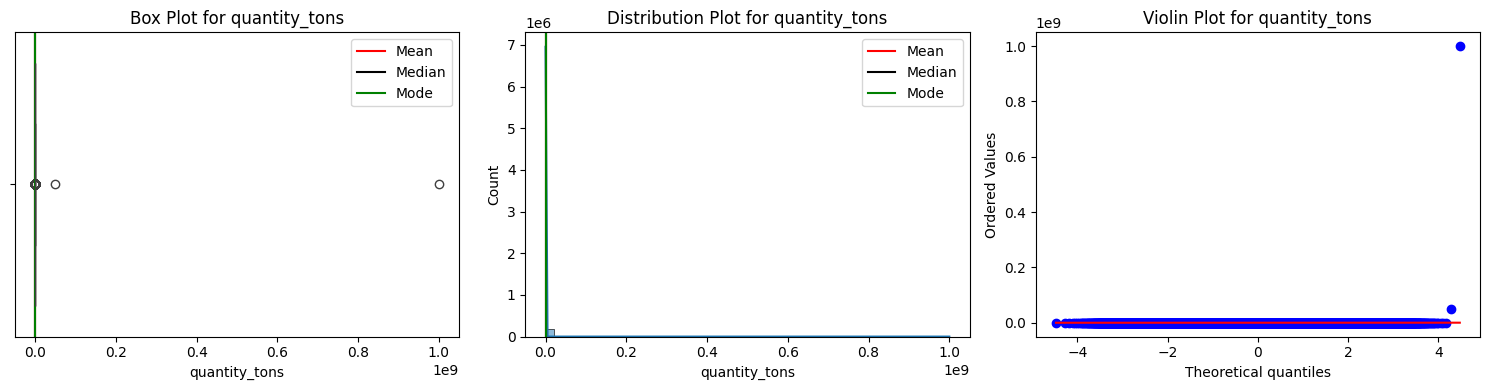

Skew for quantity_tons is 424.69


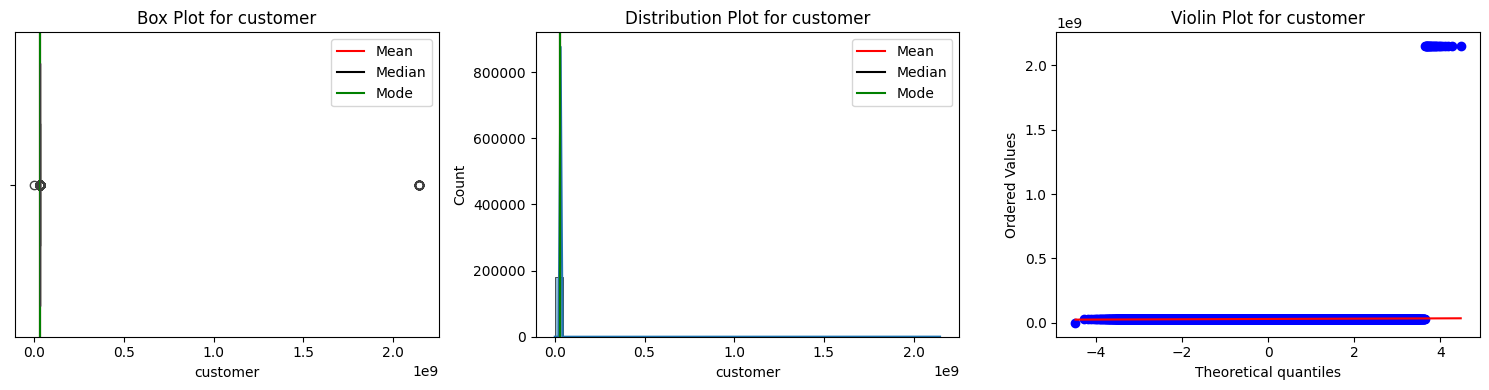

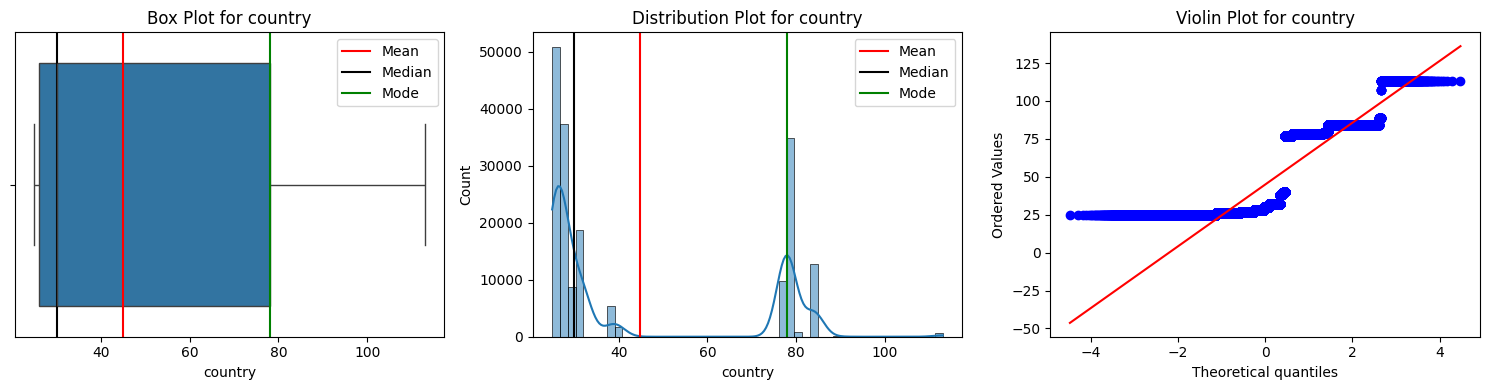

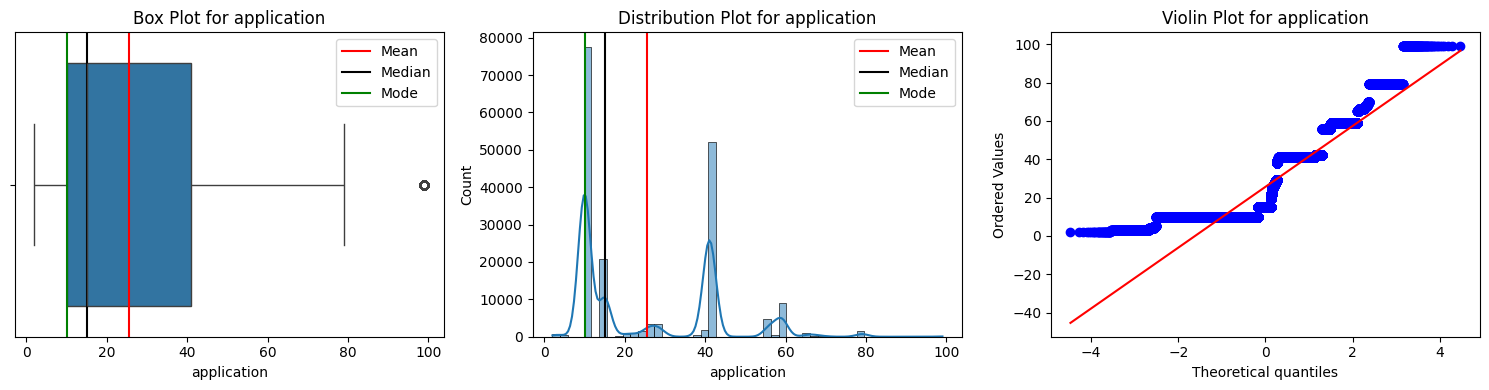

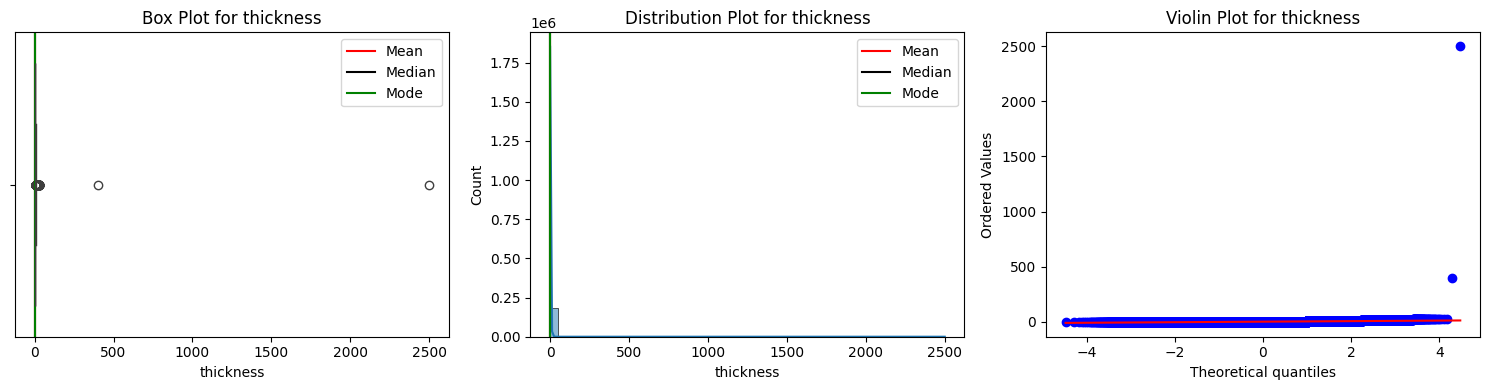

Skew for thickness is 303.45


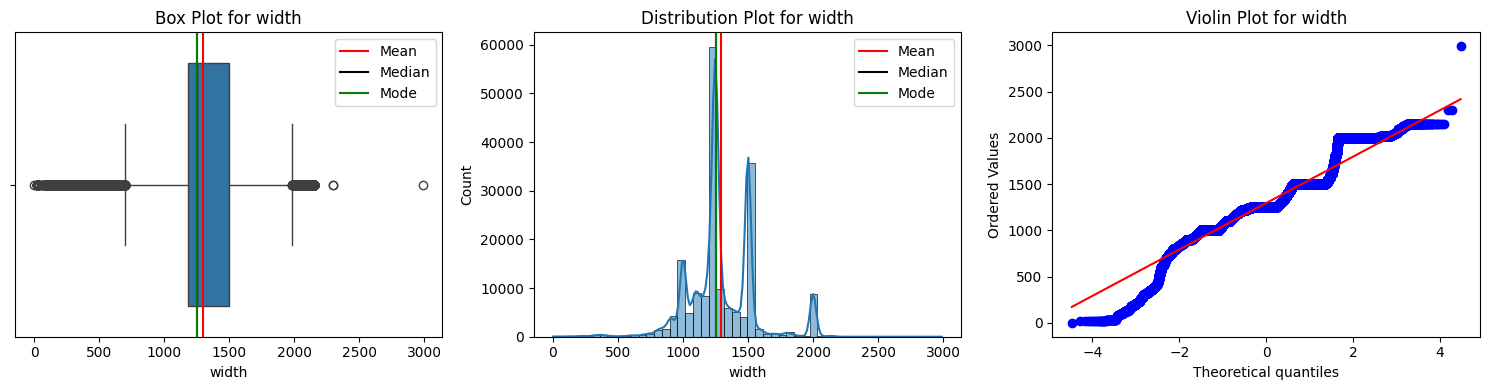

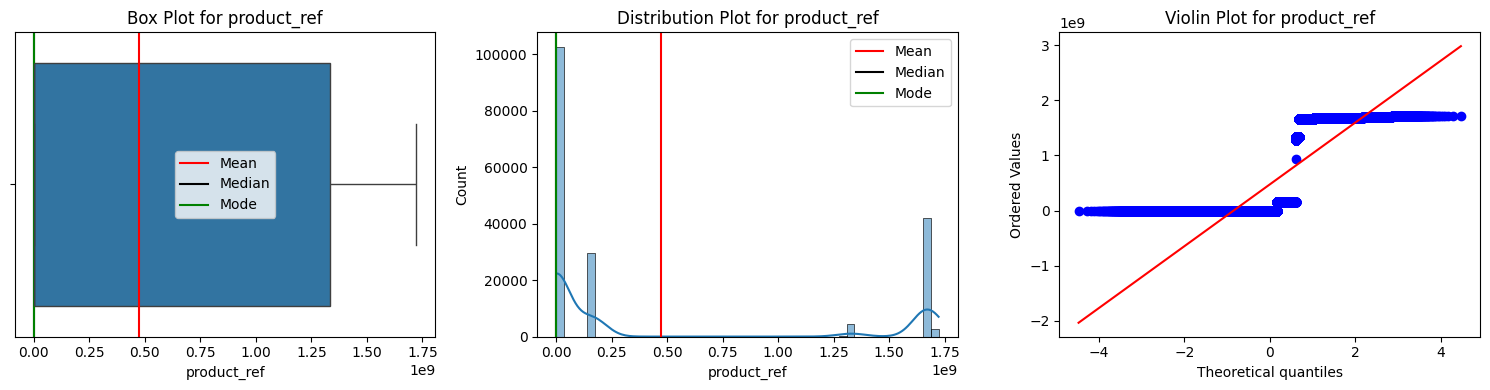

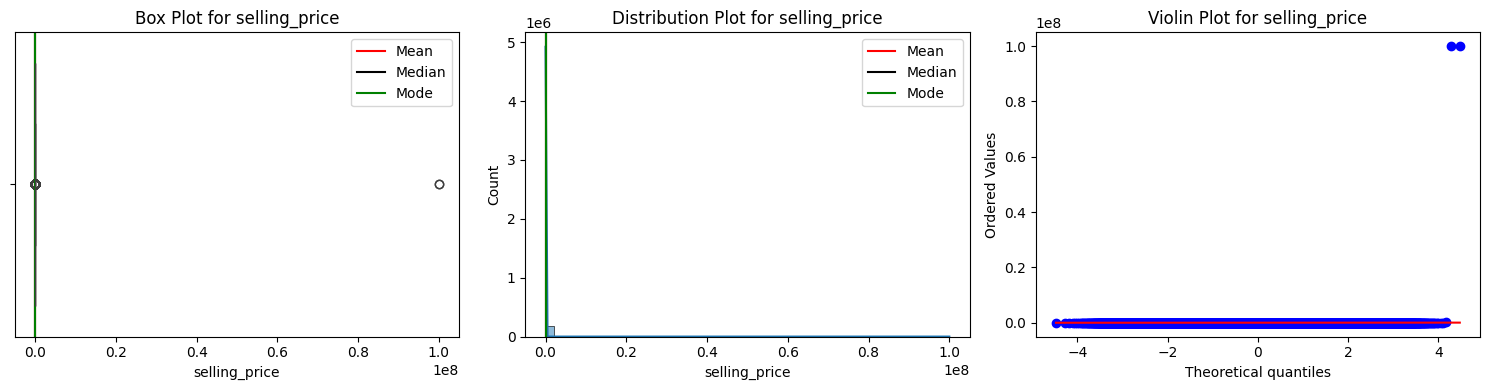

Skew for selling_price is 301.39


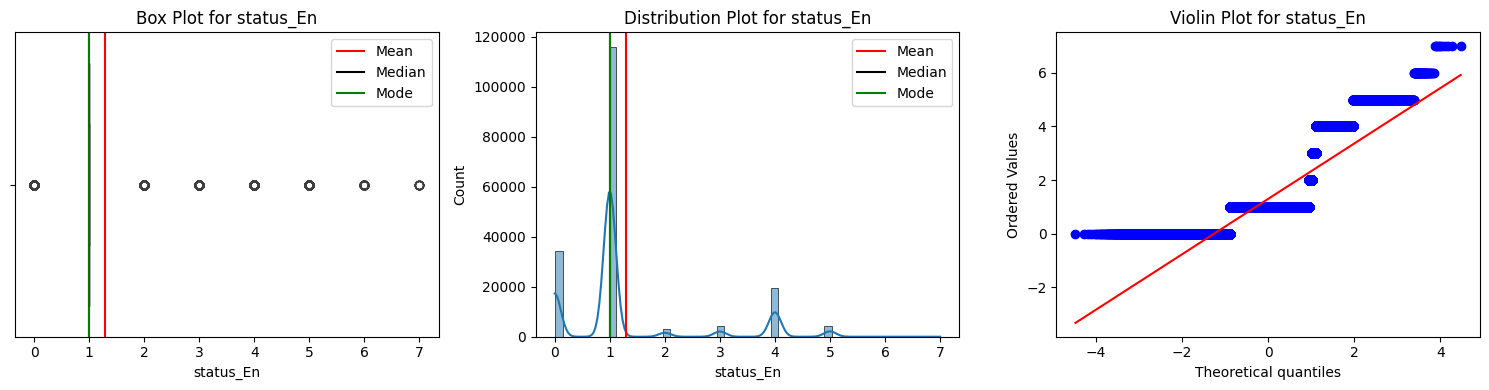

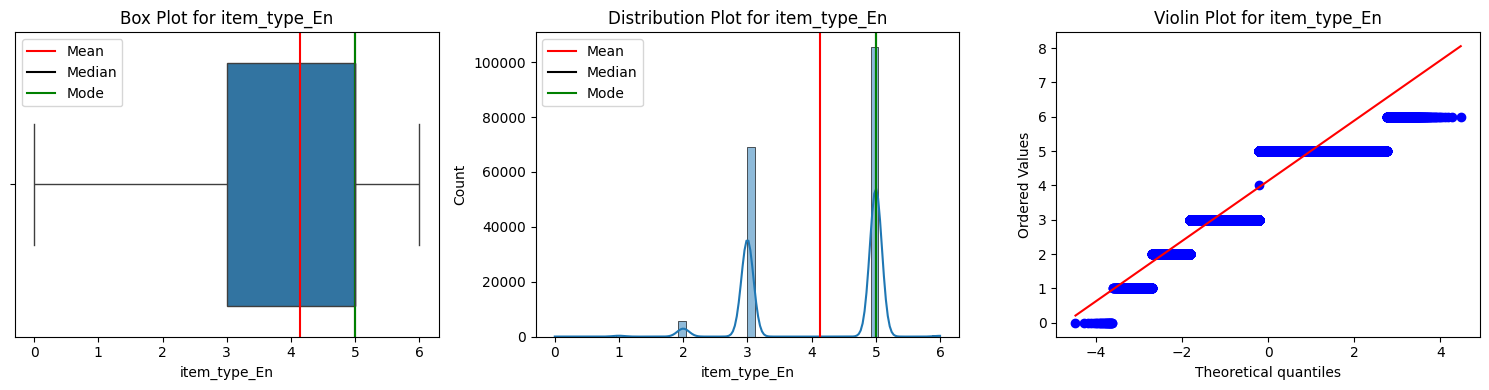

Skewed columns - ['quantity_tons', 'thickness', 'selling_price']


In [146]:
color_positive = '\033[92m'  # Green for positive skew
color_negative = '\033[91m'  # Red for negative skew
color_neutral = '\033[0m'  # Reset color for near-zero skew
skewed_col=[]
for i in data:
    plots(df1,i)
    if i in  ['quantity_tons', 'thickness', 'selling_price']:
        skew_val = skew_dict[i]
        color = color_neutral
        if skew_val > 0.5:
            color = color_positive
            skewed_col.append(i)
        elif skew_val < -0.5:
            color = color_negative
            skewed_col.append(i)
        print(f"{color}Skew for {i} is {skew_val:.2f}{color_neutral}")    
print(f"Skewed columns - {skewed_col}")

In [147]:
def outlier(df, column,iqr_fact):
    df2=df.copy()
    iqr = df2[column].quantile(0.75) - df2[column].quantile(0.25)
    upper_threshold = df2[column].quantile(0.75) + (iqr_fact*iqr)
    lower_threshold = df2[column].quantile(0.25) - (iqr_fact*iqr)
    df2[column] = df2[column].clip(lower_threshold, upper_threshold)
    return df2

In [148]:
dfff=df1.copy()

In [190]:
def skewness(df,column,method):
    func = getattr(np, method)
    new_column=f'{column}_{method}'
    df[new_column] = func(df[column])
    return df


In [165]:
new_skwed_col=[]
for i in skewed_col:
    skewness(dfff,i,'reciprocal')
    new_skwed_col.append(f'{i}_reciprocal')

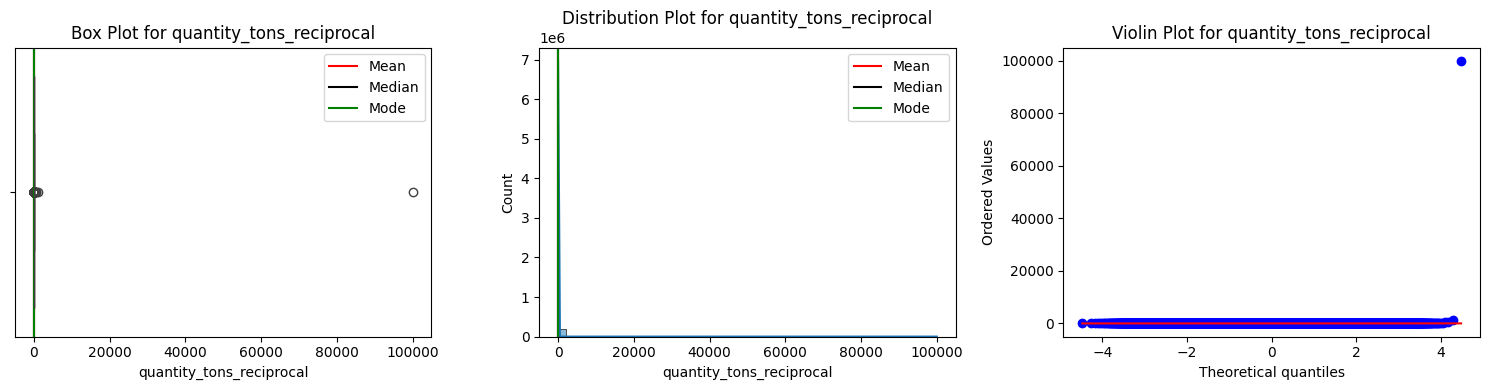

quantity_tons_reciprocal - - 426.08587646484375


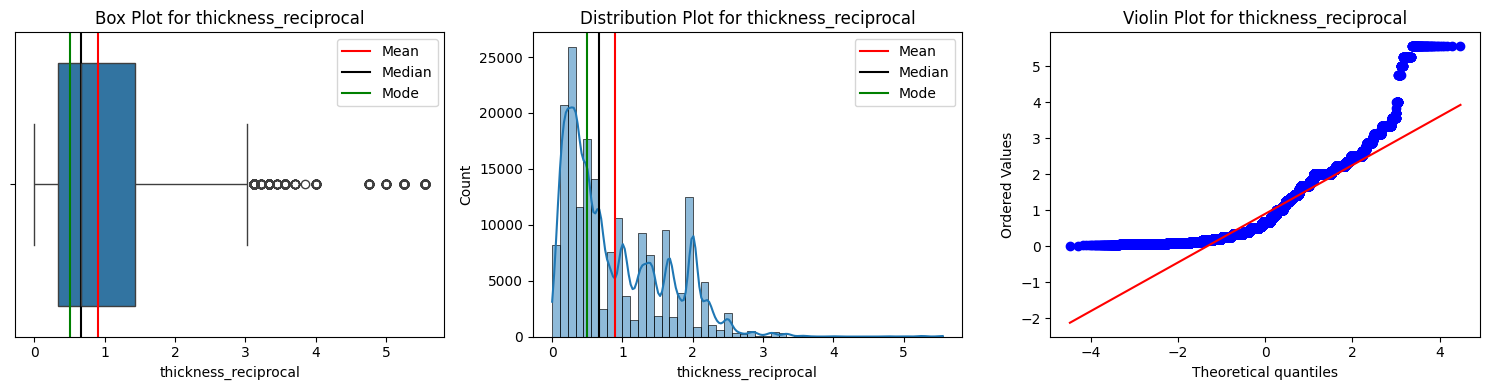

thickness_reciprocal - - 1.0376646518707275


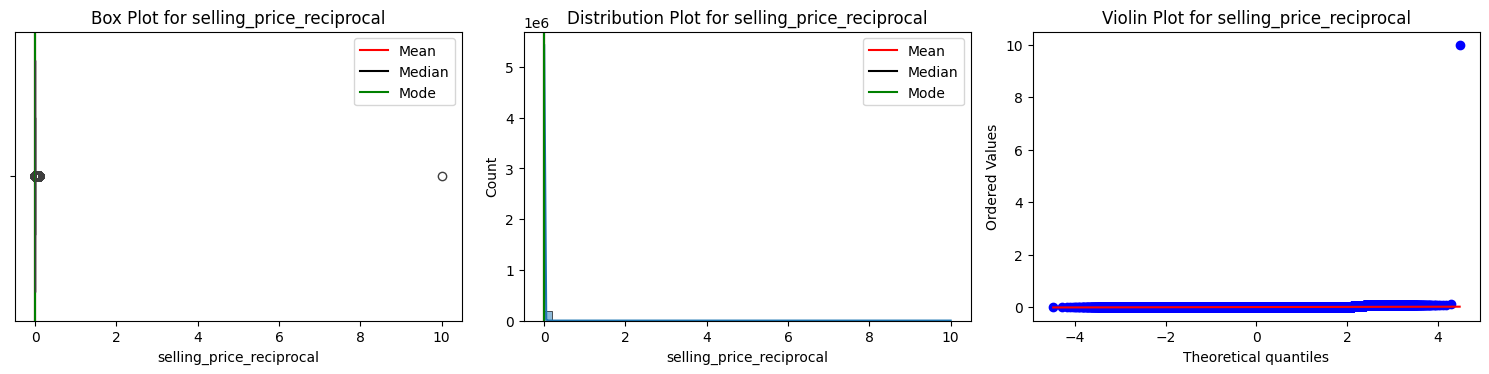

selling_price_reciprocal - - 357.2106791339912


In [163]:
for i in new_skwed_col:
      plots(dfff,i)
      print(f'{i} - - {dfff[i].skew()}')

In [193]:
methods = {
    'log': np.log,
    'square': np.sqrt,
    'exp': np.exp,
    'rec': lambda x: 1 / x,
    'sig': lambda x: 1 / (1 + np.exp(-x)),
    'pow': lambda x: np.power(x, 2),
    'z': lambda x: (x - np.mean(x)) / np.std(x)
        }
def skewness(df,column,method):
    func = getattr(np, method)
    new_column=f'{column}_{method}'
    df[new_column] = func(df[column])
    return df
coll=['quantity_tons','selling_price','thicjness']
for col in coll:
    for key,value in methods.items():
        skewness(dfff,col,key)
        
    


e:\Technology\Python Project\Capstone\Copper_Modeling\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


TypeError: 'module' object is not callable

quantity_tons_log
selling_price_log
thickness_log


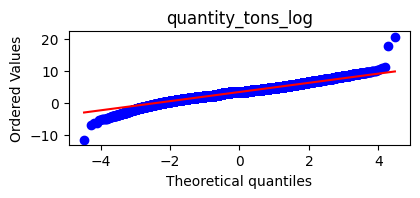

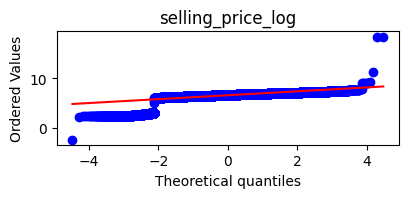

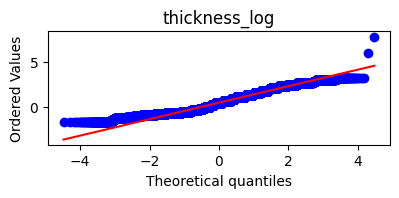

quantity_tons_square
selling_price_square
thickness_square


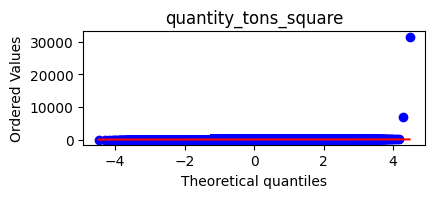

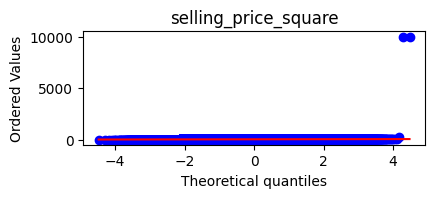

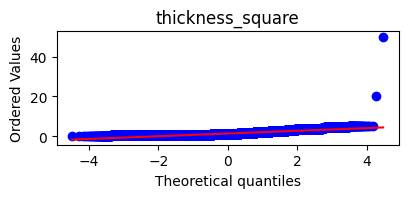

quantity_tons_rec
selling_price_rec
thickness_rec


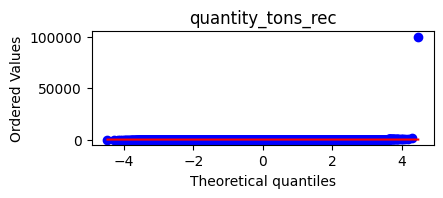

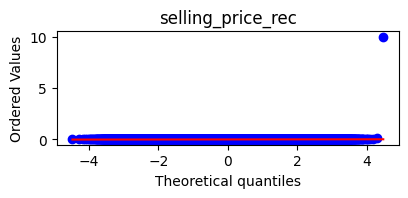

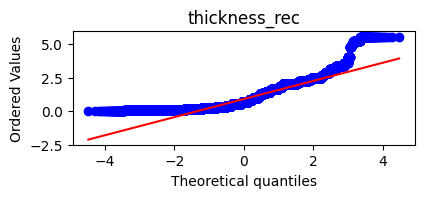

quantity_tons_sig


ValueError: num must be an integer with 1 <= num <= 9, not 10

<Figure size 1500x500 with 0 Axes>

In [217]:
import numpy as np
import pandas as pd

# Define the dictionary mapping method names to corresponding functions
method_functions = {
    'log': np.log,
    'square': np.sqrt,
    'rec': lambda x: 1 / x,
    'sig': lambda x: 1 / (1 + np.exp(-x)),
    'pow': lambda x: np.power(x, 2),
}

def skewness(df, column, method):
    # Get the corresponding function for the given method
    func = method_functions[method]
    
    # Define the new column name based on the method used
    new_column = f'{column}_{method}'
    
    # Apply the function to the specified column and create a new column with the transformed values
    df[new_column] = df[column].apply(func)
    
    return df

# Columns to apply skewness transformations on
columns = ['quantity_tons', 'selling_price', 'thickness']

# Iterate over columns and methods to apply skewness transformations
subplot_index = 1
for method in method_functions:
    for col in columns:
        skewness(df1, col, method)
        print(f'{col}_{method}')
        plt.figure(figsize=(15, 5))
        plt.subplot(3, len(columns), subplot_index)
        stat.probplot(df1[f'{col}_{method}'],dist='norm',plot=pylab)
        plt.title(f'{col}_{method}')
        subplot_index += 1
    plt.show()
        
        


quantity_tons_log
selling_price_log
thickness_log
quantity_tons_square
selling_price_square
thickness_square
quantity_tons_rec
selling_price_rec
thickness_rec
quantity_tons_sig
selling_price_sig
thickness_sig
quantity_tons_pow
selling_price_pow
thickness_pow


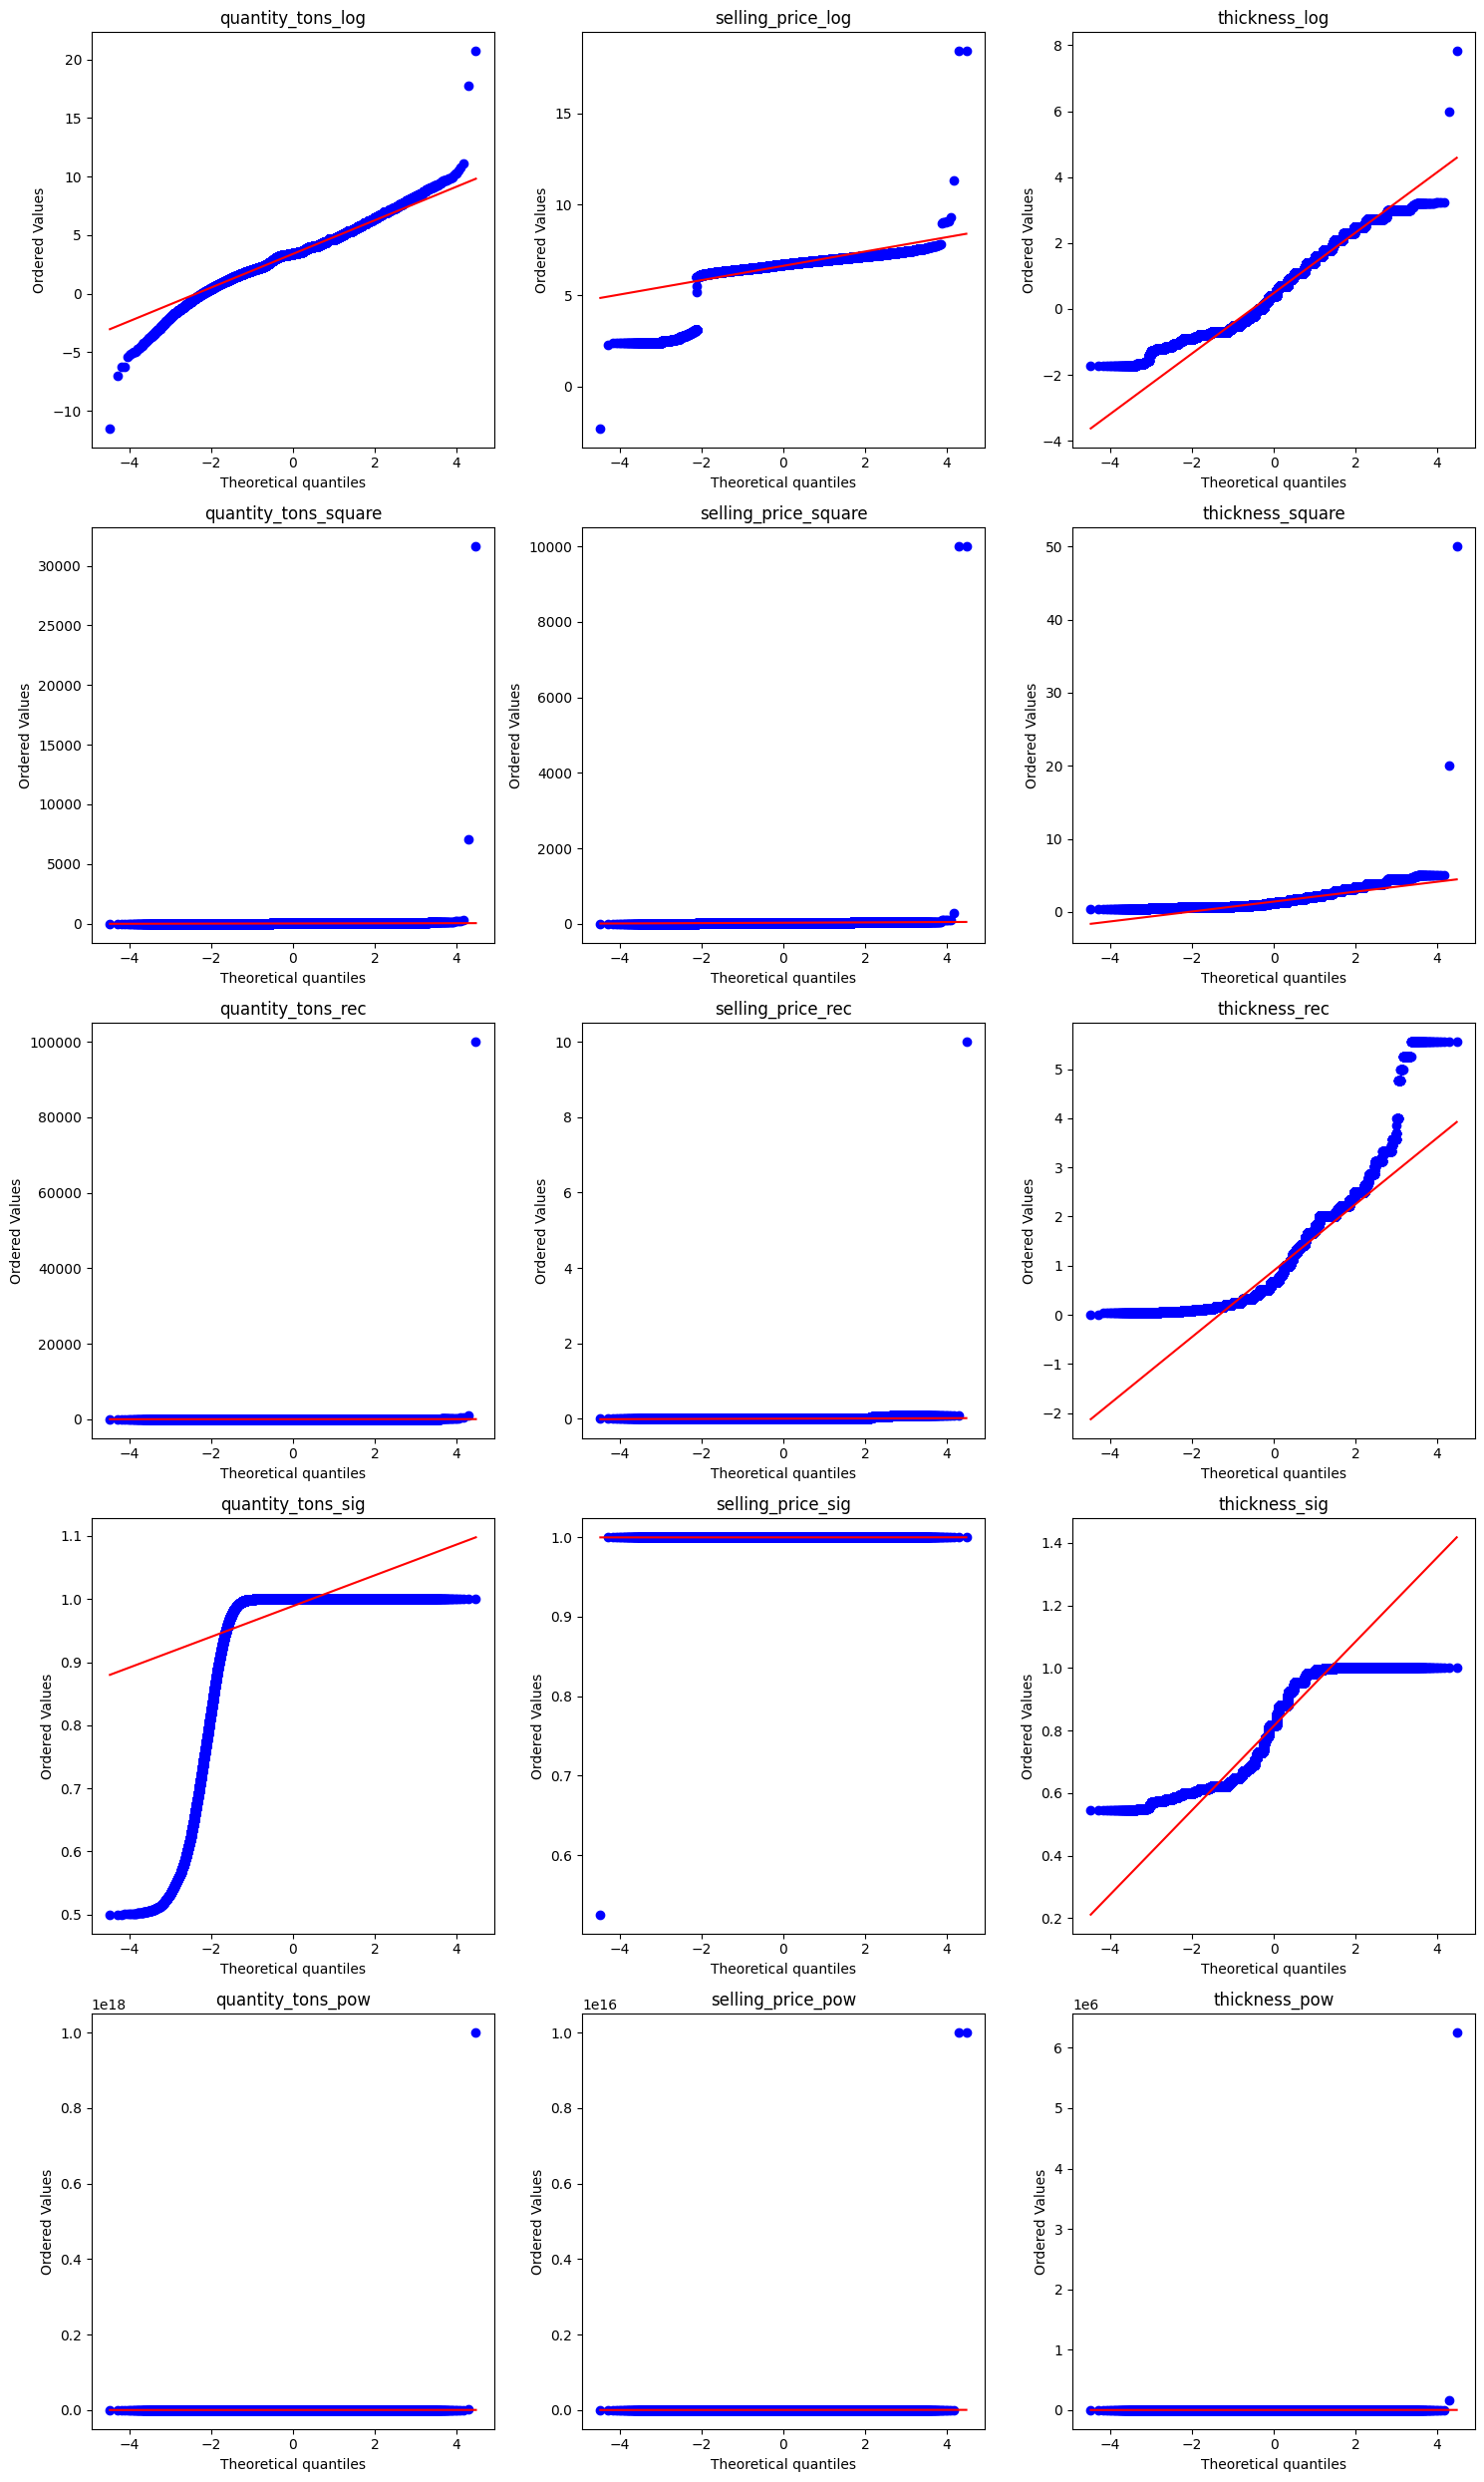

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

# Define the dictionary mapping method names to corresponding functions
method_functions =  {
    'log': np.log,
    'square': np.sqrt,
    'rec': lambda x: 1 / x,
    'sig': lambda x: 1 / (1 + np.exp(-x)),
    'pow': lambda x: np.power(x, 2),
        }

def skewness(df, column, method):
    # Get the corresponding function for the given method
    func = method_functions[method]
    
    # Define the new column name based on the method used
    new_column = f'{column}_{method}'
    
    # Apply the function to the specified column and create a new column with the transformed values
    df[new_column] = df[column].apply(func)
    
    return df

# Columns to apply skewness transformations on
columns = ['quantity_tons', 'selling_price', 'thickness']

# Calculate the number of methods and columns
num_methods = len(method_functions)
num_columns = len(columns)

# Set up the subplot layout
fig, axs = plt.subplots(num_methods, num_columns, figsize=(15, 5*num_methods))

# Iterate over methods and columns to apply skewness transformations and plot Q-Q plots
for method_idx, method in enumerate(method_functions):
    for col_idx, col in enumerate(columns):
        
        skewness(df1, col, method)
        new_column = f'{col}_{method}'
        
        # Plot the Q-Q plot on the corresponding subplot
        ax = axs[method_idx, col_idx]

        stat.probplot(df1[new_column], dist='norm', plot=ax)
        ax.set_title(f'{col}_{method}')

# Adjust the layout and spacing of subplots
plt.tight_layout()
plt.show()


In [225]:
pd.set_option('display.max_columns', 100)

df1

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,status_En,item_type_En,quantity_tons_log,quantity_tons_square,quantity_tons_exp,quantity_tons_rec,quantity_tons_sig,quantity_tons_pow,quantity_tons_z,selling_price_log,selling_price_square,selling_price_exp,selling_price_rec,selling_price_sig,selling_price_pow,selling_price_z,thickness_log,thickness_square,thickness_exp,thickness_rec,thickness_sig,thickness_pow,thickness_z
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151138,30156308,28,Won,W,10,2.00,1500,1670798778,2021-07-01,854.00,1,5,3.991779,7.358746,3.292612e+23,0.018467,1.000000,2932.345780,NaN,6.749931,29.223278,inf,0.001171,1.0,7.293160e+05,NaN,0.693147,1.414214,7.389056,0.500000,0.880797,4.0000,NaN
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024841,30202938,25,Won,W,41,0.80,1210,1668701718,2021-04-01,1047.00,1,5,6.643822,27.713261,inf,0.001302,1.000000,589862.156867,NaN,6.953684,32.357379,inf,0.000955,1.0,1.096209e+06,NaN,-0.223144,0.894427,2.225541,1.250000,0.689974,0.6400,NaN
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127960,30153963,30,Won,WI,28,0.38,952,628377,2021-01-01,644.33,1,6,5.956169,19.650139,inf,0.002590,1.000000,149094.801652,NaN,6.468211,25.383656,6.744714e+279,0.001552,1.0,4.151611e+05,NaN,-0.967584,0.616441,1.462284,2.631579,0.593873,0.1444,NaN
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411072,30349574,32,Won,S,59,2.30,1317,1668701718,2021-01-01,768.00,1,3,5.310301,14.227124,inf,0.004940,1.000000,40970.241978,NaN,6.643790,27.712813,inf,0.001302,1.0,5.898240e+05,NaN,0.832909,1.516575,9.974182,0.434783,0.908877,5.2900,NaN
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526245,30211560,28,Won,W,10,4.00,2000,640665,2021-03-01,577.00,1,5,6.666354,28.027241,inf,0.001273,1.000000,617051.481768,NaN,6.357842,24.020824,3.871828e+250,0.001733,1.0,3.329290e+05,NaN,1.386294,2.000000,54.598148,0.250000,0.982014,16.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854,25,Won,W,41,0.96,1220,164141591,2020-07-01,591.00,1,5,4.629691,10.123361,inf,0.009758,1.000000,10502.646793,NaN,6.381816,24.310492,4.656277e+256,0.001692,1.0,3.492810e+05,NaN,-0.040822,0.979796,2.611696,1.041667,0.723122,0.9216,NaN
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086472,30200854,25,Won,W,41,0.95,1500,164141591,2020-07-01,589.00,1,5,5.337954,14.425202,inf,0.004806,1.000000,43299.979645,NaN,6.378426,24.269322,6.301586e+255,0.001698,1.0,3.469210e+05,NaN,-0.051293,0.974679,2.585710,1.052632,0.721115,0.9025,NaN
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854,25,Won,W,41,0.71,1250,164141591,2020-07-01,619.00,1,5,1.443524,2.058056,6.910270e+01,0.236094,0.985735,17.940255,NaN,6.428105,24.879711,6.734173e+268,0.001616,1.0,3.831610e+05,NaN,-0.342490,0.842615,2.033991,1.408451,0.670401,0.5041,NaN
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30.365013,30200854,25,Won,W,41,0.85,1250,164141591,2020-07-01,601.00,1,5,3.413291,5.510446,1.539422e+13,0.032933,1.000000,922.034022,NaN,6.398595,24.515301,1.025613e+261,0.001664,1.0,3.612010e+05,NaN,-0.162519,0.921954,2.339647,1.176471,0.700567,0.7225,NaN
